In [75]:
# Assignment 5
# Step 1: Import Packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Input
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')


In [77]:
# Step 2: Data Loading/Processing
# 2.1: Generate synthetic data
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 3) * 100 # Features: size, location, bedrooms
y = X[:, 0] * 3 + X[:, 1] * 2 + X[:, 2] * 4 + np.random.randn(n_samples) * 10

In [79]:
# Split data into train and test sets
from sklearn . model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y ,test_size =0.2 , random_state =42)

In [81]:
# Define the model
model = Sequential([
    Input(shape=(3,)),  # This replaces input_dim=3
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_squared_error',
    metrics=['mae']
)

In [83]:
# Train the model
history = model . fit (
    X_train , y_train ,
    validation_split =0.2 ,
    epochs =50 ,
    batch_size =32
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 104140.3047 - mae: 273.3638 - val_loss: 2747.4390 - val_mae: 43.8197
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6196.3262 - mae: 66.1622 - val_loss: 1471.7576 - val_mae: 35.6460
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 778.7529 - mae: 23.1179 - val_loss: 399.2774 - val_mae: 17.1145
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 289.9537 - mae: 13.8677 - val_loss: 185.3257 - val_mae: 11.1586
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.0318 - mae: 10.0166 - val_loss: 125.8354 - val_mae: 9.1966
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122.6524 - mae: 8.6727 - val_loss: 121.5769 - val_mae: 8.9316
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 115.7169 - mae: 8.5081 - val_loss: 121.7193 - val_mae: 8.9457
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110.0613 - mae: 8.5295 - val_loss: 124.0160 - val_mae: 9.0287
Epoch 9/50
20/20 ━━━━━━━

In [64]:
# Evaluate on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103.7085 - mae: 8.3647
Test Loss: 113.65978240966797, Test MAE: 8.678581237792969


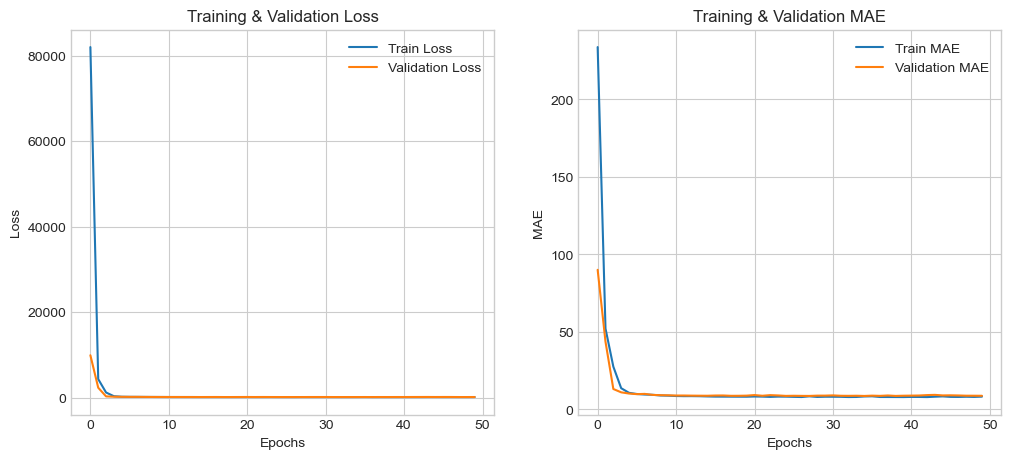

In [65]:
# Plot training loss and MAE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot loss
ax[0].plot(history.history['loss'], label='Train Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()

# Plot MAE
ax[1].plot(history.history['mae'], label='Train MAE')
ax[1].plot(history.history['val_mae'], label='Validation MAE')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MAE')
ax[1].set_title('Training & Validation MAE')
ax[1].legend()

plt.show()


In [66]:
# Make predictions
predictions = model . predict ( X_test )

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


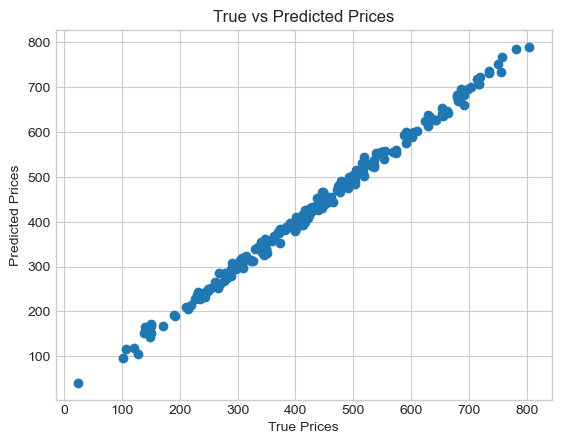

In [67]:
plt.scatter(y_test, predictions)
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()